# Titanic Survivor Prediction based on various features

## PART 1 Define

### Define the Problem

This project explains how to predict the survivors from titanic based on the features. The features are like class, gender, age, embarked, and fare. I will analyze the data available and create the model that will predict the survivors based on these features. 

### Import Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## PART 2 Discover

### Load the data

In [10]:
#Load the data into a pandas DataFrame
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

In [11]:
#check train info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [13]:
#check train describe
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [15]:
#check train head
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Explore the data

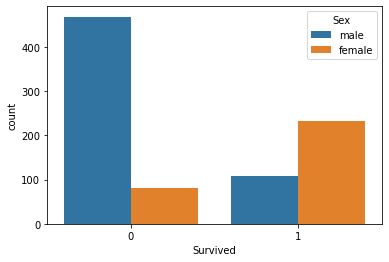

In [17]:
sns.countplot(x='Survived',hue='Sex',data=train)

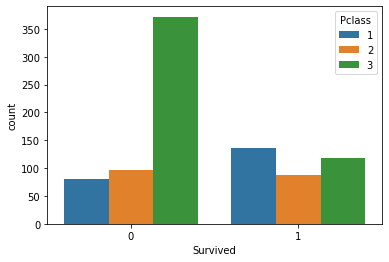

In [18]:
sns.countplot(x='Survived',data=train,hue='Pclass')

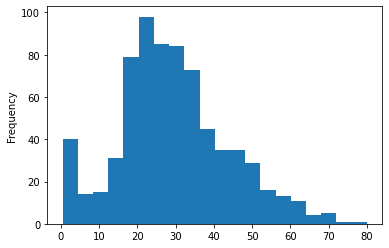

In [19]:
train['Age'].plot.hist(bins=20)

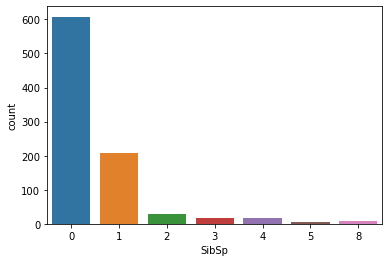

In [20]:
sns.countplot(x='SibSp',data=train)

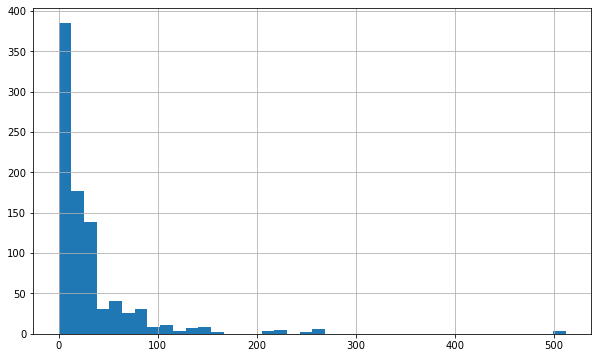

In [21]:
train['Fare'].hist(bins=40,figsize=(10,6))

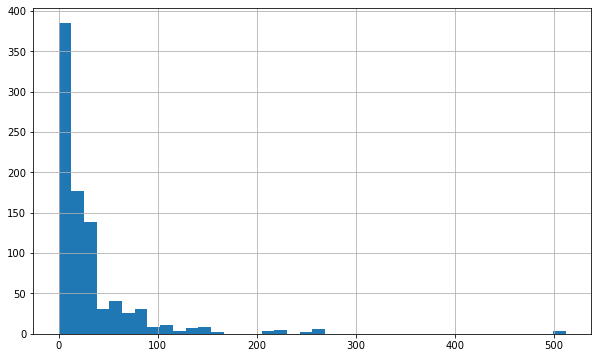

In [22]:
train['Fare'].hist(bins=40,figsize=(10,6))

### Clean the data

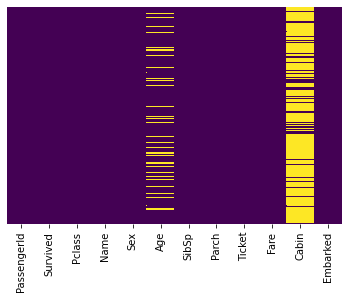

In [23]:
#check the null values using the heatmap
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

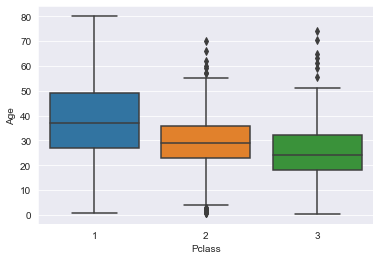

In [24]:
sns.set_style('darkgrid')
sns.boxplot(x='Pclass',y='Age',data=train)

In [25]:
def set_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [26]:
#fill the null values for age
train['Age'] = train[['Age','Pclass']].apply(set_age,axis=1)

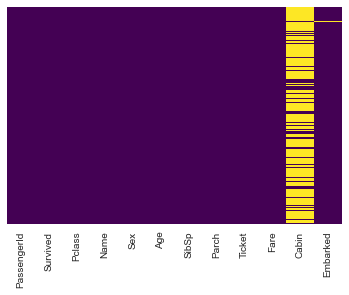

In [27]:
#check the age null values filled up using the heatmap
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [28]:
#drop the cabin permanently
train.drop('Cabin',inplace=True,axis=1)

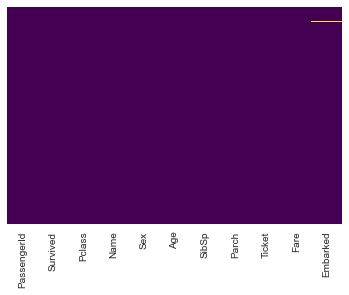

In [29]:
#check if the cabin column is dropped using the heatmap
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [30]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [31]:
#drop the row where Embarked is null
train = train.dropna()

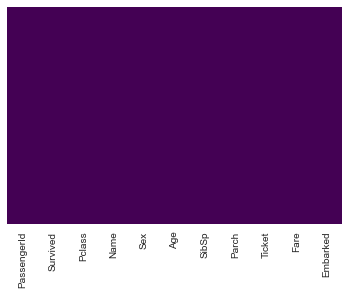

In [32]:
#check if the Embarked has no null values using the heatmap
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [33]:
#get dummies for sex, embarked, and pclass
sex = pd.get_dummies(train['Sex'],drop_first=True)
embarked = pd.get_dummies(train['Embarked'],drop_first=True)
pclass = pd.get_dummies(train['Pclass'],drop_first=True)

In [34]:
#concat sex, embarked, and pclass to train dataframe
train = pd.concat([train,sex, embarked, pclass],axis=1)

In [35]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [36]:
#drop PassengerId, Name, Sex, Ticket, Embarked, Pclass
train.drop(['PassengerId','Name','Sex','Ticket','Embarked', 'Pclass'],axis=1,inplace=True)

In [37]:
train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


## PART 3 Develop

In [43]:
#import libraries
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [45]:
X = train.drop('Survived',axis=1)
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

### Logistic Regression

In [75]:
#import libraries
from sklearn.linear_model import LogisticRegression

In [76]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [77]:
lr_predictions = lr.predict(X_test)

In [78]:
print(classification_report(y_test, lr_predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.68      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.83      0.82       267



In [79]:
print(confusion_matrix(y_test, lr_predictions))

[[150  13]
 [ 33  71]]


In [80]:
print('MSE:', metrics.mean_squared_error(y_test, lr_predictions))

MSE: 0.17228464419475656


### Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rfc = RandomForestClassifier(n_estimators = 200)

In [56]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [57]:
rfc_predictions = rfc.predict(X_test)

In [58]:
print(classification_report(y_test, rfc_predictions))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       163
           1       0.79      0.71      0.75       104

    accuracy                           0.81       267
   macro avg       0.81      0.79      0.80       267
weighted avg       0.81      0.81      0.81       267



In [59]:
print(confusion_matrix(y_test, rfc_predictions))

[[143  20]
 [ 30  74]]


In [60]:
print('MSE:', metrics.mean_squared_error(y_test, rfc_predictions))

MSE: 0.18726591760299627


### Support Vector Machines (SVM)

In [61]:
from sklearn.svm import SVC

In [62]:
svc = SVC()

In [63]:
svc.fit(X_train,y_train)

SVC()

In [64]:
svc_predictions = svc.predict(X_test)

In [65]:
print(classification_report(y_test, svc_predictions))

              precision    recall  f1-score   support

           0       0.67      0.90      0.77       163
           1       0.65      0.31      0.42       104

    accuracy                           0.67       267
   macro avg       0.66      0.60      0.59       267
weighted avg       0.66      0.67      0.63       267



In [66]:
print(confusion_matrix(y_test, svc_predictions))

[[146  17]
 [ 72  32]]


In [67]:
print('MSE:', metrics.mean_squared_error(y_test, svc_predictions))

MSE: 0.3333333333333333


### K Nearest Neighbors (KNN)

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
knn = KNeighborsClassifier()

In [70]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [71]:
knn_predictions = knn.predict(X_test)

In [72]:
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

           0       0.75      0.74      0.74       163
           1       0.59      0.61      0.60       104

    accuracy                           0.69       267
   macro avg       0.67      0.67      0.67       267
weighted avg       0.69      0.69      0.69       267



In [73]:
print(confusion_matrix(y_test, knn_predictions))

[[120  43]
 [ 41  63]]


In [74]:
print('MSE:', metrics.mean_squared_error(y_test, knn_predictions))

MSE: 0.3146067415730337
